In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows=150

## Import Datasets

In [2]:
listings = pd.read_csv('../Lisbon-Portugal-data/listings.csv', low_memory=False)
listings_two = pd.read_csv('../Lisbon-Portugal-data/listings-2.csv')
calendar = pd.read_csv('../Lisbon-Portugal-data/calendar.csv', low_memory=False)
neighborhoods = pd.read_csv('../Lisbon-Portugal-data/neighbourhoods.csv')
# reviews = pd.read_csv('../Lisbon-Portugal-data/reviews.csv', low_memory=False)
# reviews_two = pd.read_csv('../Lisbon-Portugal-data/reviews-2.csv', low_memory=False)

## Examine Data

In [3]:
listings.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_listings_count,host_total_listings_count,latitude,longitude,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.430200e+04,2.430200e+04,0.0,0.0,0.0,2.430200e+04,24301.000000,24301.000000,24302.000000,24302.000000,...,19886.000000,19875.000000,19880.00000,19877.000000,19875.000000,24302.000000,24302.000000,24302.000000,24302.00000,20075.000000
mean,2.257234e+07,2.020053e+13,NaN,NaN,NaN,9.490641e+07,20.291840,20.291840,38.755631,-9.202451,...,9.435030,9.641610,9.65659,9.536902,9.214340,14.835322,12.305654,2.150687,0.14970,1.385960
std,1.213037e+07,0.000000e+00,NaN,NaN,NaN,9.333440e+07,71.797202,71.797202,0.103688,0.110301,...,0.911513,0.826811,0.81353,0.758469,0.914887,42.781736,42.669665,6.479967,1.11104,1.411868
min,6.499000e+03,2.020053e+13,NaN,NaN,NaN,1.445500e+04,0.000000,0.000000,38.676080,-9.498520,...,2.000000,2.000000,2.00000,2.000000,2.000000,1.000000,0.000000,0.000000,0.00000,0.010000
25%,1.348872e+07,2.020053e+13,NaN,NaN,NaN,1.521207e+07,1.000000,1.000000,38.711040,-9.218737,...,9.000000,9.000000,10.00000,9.000000,9.000000,1.000000,1.000000,0.000000,0.00000,0.290000
50%,2.298439e+07,2.020053e+13,NaN,NaN,NaN,5.937474e+07,4.000000,4.000000,38.717835,-9.146800,...,10.000000,10.000000,10.00000,10.000000,9.000000,3.000000,2.000000,0.000000,0.00000,0.890000
75%,3.279862e+07,2.020053e+13,NaN,NaN,NaN,1.610771e+08,11.000000,11.000000,38.739197,-9.134610,...,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,6.000000,1.000000,0.00000,2.100000
max,4.356874e+07,2.020053e+13,NaN,NaN,NaN,3.474345e+08,1350.000000,1350.000000,39.303670,-8.838270,...,10.000000,10.000000,10.00000,10.000000,10.000000,336.000000,336.000000,69.000000,18.00000,19.610000


In [4]:
listings.drop(['thumbnail_url', 'medium_url', 'xl_picture_url'], axis=1, inplace=True)

In [5]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.430200e+04,2.430200e+04,2.430200e+04,24301.000000,24301.000000,24302.000000,24302.000000,24302.000000,24277.000000,24290.000000,...,19886.000000,19875.000000,19880.00000,19877.000000,19875.000000,24302.000000,24302.000000,24302.000000,24302.00000,20075.000000
mean,2.257234e+07,2.020053e+13,9.490641e+07,20.291840,20.291840,38.755631,-9.202451,4.057362,1.449664,1.660189,...,9.435030,9.641610,9.65659,9.536902,9.214340,14.835322,12.305654,2.150687,0.14970,1.385960
std,1.213037e+07,0.000000e+00,9.333440e+07,71.797202,71.797202,0.103688,0.110301,2.421068,0.920968,1.194550,...,0.911513,0.826811,0.81353,0.758469,0.914887,42.781736,42.669665,6.479967,1.11104,1.411868
min,6.499000e+03,2.020053e+13,1.445500e+04,0.000000,0.000000,38.676080,-9.498520,1.000000,0.000000,0.000000,...,2.000000,2.000000,2.00000,2.000000,2.000000,1.000000,0.000000,0.000000,0.00000,0.010000
25%,1.348872e+07,2.020053e+13,1.521207e+07,1.000000,1.000000,38.711040,-9.218737,2.000000,1.000000,1.000000,...,9.000000,9.000000,10.00000,9.000000,9.000000,1.000000,1.000000,0.000000,0.00000,0.290000
50%,2.298439e+07,2.020053e+13,5.937474e+07,4.000000,4.000000,38.717835,-9.146800,4.000000,1.000000,1.000000,...,10.000000,10.000000,10.00000,10.000000,9.000000,3.000000,2.000000,0.000000,0.00000,0.890000
75%,3.279862e+07,2.020053e+13,1.610771e+08,11.000000,11.000000,38.739197,-9.134610,5.000000,2.000000,2.000000,...,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,6.000000,1.000000,0.00000,2.100000
max,4.356874e+07,2.020053e+13,3.474345e+08,1350.000000,1350.000000,39.303670,-8.838270,32.000000,24.000000,25.000000,...,10.000000,10.000000,10.00000,10.000000,10.000000,336.000000,336.000000,69.000000,18.00000,19.610000


In [6]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24302 entries, 0 to 24301
Columns: 103 entries, id to reviews_per_month
dtypes: float64(18), int64(21), object(64)
memory usage: 19.1+ MB


In [7]:
listings.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24302 entries, 0 to 24301
Data columns (total 103 columns):
 #   Column                                        Dtype  
---  ------                                        -----  
 0   id                                            int64  
 1   listing_url                                   object 
 2   scrape_id                                     int64  
 3   last_scraped                                  object 
 4   name                                          object 
 5   summary                                       object 
 6   space                                         object 
 7   description                                   object 
 8   experiences_offered                           object 
 9   neighborhood_overview                         object 
 10  notes                                         object 
 11  transit                                       object 
 12  access                                        object 
 13  

In [8]:
listings['has_availability']
# if its booked can assume to show minimum if it has avail == f then booked

0        t
1        t
2        t
3        t
4        t
        ..
24297    t
24298    t
24299    t
24300    t
24301    t
Name: has_availability, Length: 24302, dtype: object

In [9]:
listings_two.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24302 entries, 0 to 24301
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              24302 non-null  int64  
 1   name                            24283 non-null  object 
 2   host_id                         24302 non-null  int64  
 3   host_name                       24301 non-null  object 
 4   neighbourhood_group             24302 non-null  object 
 5   neighbourhood                   24302 non-null  object 
 6   latitude                        24302 non-null  float64
 7   longitude                       24302 non-null  float64
 8   room_type                       24302 non-null  object 
 9   price                           24302 non-null  int64  
 10  minimum_nights                  24302 non-null  int64  
 11  number_of_reviews               24302 non-null  int64  
 12  last_review                     

In [10]:
listings_two.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.430200e+04,2.430200e+04,24302.000000,24302.000000,24302.000000,24302.000000,24302.000000,20075.000000,24302.000000,24302.000000
mean,2.257234e+07,9.490641e+07,38.755631,-9.202451,111.541848,3.391367,41.446054,1.385960,14.835322,223.512880
std,1.213037e+07,9.333440e+07,0.103688,0.110301,351.691298,16.272085,65.824770,1.411868,42.781736,135.147466
min,6.499000e+03,1.445500e+04,38.676080,-9.498520,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.348872e+07,1.521207e+07,38.711040,-9.218737,47.000000,1.000000,2.000000,0.290000,1.000000,97.000000
50%,2.298439e+07,5.937474e+07,38.717835,-9.146800,70.000000,2.000000,13.000000,0.890000,3.000000,269.000000
75%,3.279862e+07,1.610771e+08,38.739197,-9.134610,100.000000,3.000000,53.000000,2.100000,10.000000,351.000000
max,4.356874e+07,3.474345e+08,39.303670,-8.838270,10000.000000,1000.000000,877.000000,19.610000,336.000000,365.000000


In [11]:
listings.count()

id                                              24302
listing_url                                     24302
scrape_id                                       24302
last_scraped                                    24302
name                                            24283
summary                                         23382
space                                           19104
description                                     23980
experiences_offered                             24302
neighborhood_overview                           16602
notes                                           12599
transit                                         16325
access                                          13340
interaction                                     14543
house_rules                                     14160
picture_url                                     24302
host_id                                         24302
host_url                                        24302
host_name                   

In [12]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=103)

## check nulls

In [13]:
# listings.isna()
# listings.isnull().sum()
# listings.isnull().values.any()
# listings.isnull().sum().sum()

In [14]:
# mask = listings.notna()
# listings[mask]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6499,https://www.airbnb.com/rooms/6499,20200528045718,2020-06-06,Belém 1 Bedroom Historical Apartment,"This apartment is all about Location, next to ...",Fully furnished apartment (35m2). Small inside...,"This apartment is all about Location, next to ...",none,"To get to the city center, tram 15 stops in f...",...,t,f,moderate,f,f,1,1,0,0,0.37
1,25659,https://www.airbnb.com/rooms/25659,20200528045718,2020-05-28,"Sunny, Alfama Sleeps 3 - Coeur d'Alfama",Sunny 1 Bedroom cozy apartment in historic Alf...,"Charming, sunny, cozy apartment in the heart o...",Sunny 1 Bedroom cozy apartment in historic Alf...,none,Alfama is the oldest and most picturesque quar...,...,t,f,moderate,f,f,1,1,0,0,1.52
2,29248,https://www.airbnb.com/rooms/29248,20200528045718,2020-05-29,Apartamento Alfama com vista para o rio!,NaN,"Located in the city center, and great location...","Located in the city center, and great location...",none,NaN,...,t,f,flexible,f,f,1,1,0,0,2.80
3,29396,https://www.airbnb.com/rooms/29396,20200528045718,2020-05-28,Alfama Hill - Boutique apartment,Feel at home in the historic centre of Lisbon.,"Charming apartment renovated in 2017, on the g...",Feel at home in the historic centre of Lisbon....,none,Great neighborhood in the old part of town. Am...,...,t,f,flexible,f,t,2,2,0,0,2.45
4,29720,https://www.airbnb.com/rooms/29720,20200528045718,2020-06-06,TheHOUSE - Your luxury home,"A house at the top of an anonimous building, T...","The size, the decoration and, especially, our ...","A house at the top of an anonimous building, T...",none,"Location in the city's Embassies area, near en...",...,f,f,strict_14_with_grace_period,f,t,2,2,0,0,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24297,43563899,https://www.airbnb.com/rooms/43563899,20200528045718,2020-06-05,Room with privat w.c. river view on City center,This house it's in the most beautiful and cent...,100mts walking you will have one of the best v...,This house it's in the most beautiful and cent...,none,NaN,...,f,f,flexible,f,f,1,0,1,0,NaN
24298,43563972,https://www.airbnb.com/rooms/43563972,20200528045718,2020-06-05,Ericeira Paradise Hostel&Suites,O Ericeira Paradise Hostel & Suites é uma casa...,"Situado na Ericeira, a 43 km do Estoril, o Eri...",O Ericeira Paradise Hostel & Suites é uma casa...,none,NaN,...,t,f,flexible,f,f,1,1,0,0,NaN
24299,43566725,https://www.airbnb.com/rooms/43566725,20200528045718,2020-06-06,Volkswagen Grand California - Mr.Vancamper,The New Grand California provides even more in...,NaN,The New Grand California provides even more in...,none,NaN,...,t,f,strict_14_with_grace_period,f,f,3,3,0,0,NaN
24300,43568507,https://www.airbnb.com/rooms/43568507,20200528045718,2020-06-06,"Confortável Autocaravana 6 lugares, enjoy Port...","Nossa ""Laranjinha"" tem a grande vantagem de te...","Vários locais para arrumação, tem TV e vai com...","Nossa ""Laranjinha"" tem a grande vantagem de te...",none,A mobilidade e flexibilidade de poder parar e ...,...,f,f,flexible,f,f,2,2,0,0,NaN


In [15]:
listings.head(10)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6499,https://www.airbnb.com/rooms/6499,20200528045718,2020-06-06,Belém 1 Bedroom Historical Apartment,"This apartment is all about Location, next to ...",Fully furnished apartment (35m2). Small inside...,"This apartment is all about Location, next to ...",none,"To get to the city center, tram 15 stops in f...",...,t,f,moderate,f,f,1,1,0,0,0.37
1,25659,https://www.airbnb.com/rooms/25659,20200528045718,2020-05-28,"Sunny, Alfama Sleeps 3 - Coeur d'Alfama",Sunny 1 Bedroom cozy apartment in historic Alf...,"Charming, sunny, cozy apartment in the heart o...",Sunny 1 Bedroom cozy apartment in historic Alf...,none,Alfama is the oldest and most picturesque quar...,...,t,f,moderate,f,f,1,1,0,0,1.52
2,29248,https://www.airbnb.com/rooms/29248,20200528045718,2020-05-29,Apartamento Alfama com vista para o rio!,NaN,"Located in the city center, and great location...","Located in the city center, and great location...",none,NaN,...,t,f,flexible,f,f,1,1,0,0,2.80
3,29396,https://www.airbnb.com/rooms/29396,20200528045718,2020-05-28,Alfama Hill - Boutique apartment,Feel at home in the historic centre of Lisbon.,"Charming apartment renovated in 2017, on the g...",Feel at home in the historic centre of Lisbon....,none,Great neighborhood in the old part of town. Am...,...,t,f,flexible,f,t,2,2,0,0,2.45
4,29720,https://www.airbnb.com/rooms/29720,20200528045718,2020-06-06,TheHOUSE - Your luxury home,"A house at the top of an anonimous building, T...","The size, the decoration and, especially, our ...","A house at the top of an anonimous building, T...",none,"Location in the city's Embassies area, near en...",...,f,f,strict_14_with_grace_period,f,t,2,2,0,0,0.48
5,29915,https://www.airbnb.com/rooms/29915,20200528045718,2020-06-05,Modern and Cool Apartment in Lisboa,A modern and equipped apartment. Quiet and pea...,"Large 1 bedroom apartment, in a just built mod...",A modern and equipped apartment. Quiet and pea...,none,"Location: Entrecampos, Avenida das Forças Arma...",...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,0.31
6,33348,https://www.airbnb.com/rooms/33348,20200528045718,2020-06-05,Happy Season,NaN,"Five minutes by foot to subway Campo Grande, y...","Five minutes by foot to subway Campo Grande, y...",none,NaN,...,f,f,strict_14_with_grace_period,f,f,2,1,1,0,0.02
7,40817,https://www.airbnb.com/rooms/40817,20200528045718,2020-06-05,"Chiado, Alecrim walk to Riverfront","Lockdown in Lisbon is over! All is ready, in...","This is a large suite is in the 3rd floor, wit...","Lockdown in Lisbon is over! All is ready, in...",none,"Located a few steps away, (5 mn walk), from th...",...,t,f,flexible,f,f,15,15,0,0,3.14
8,42519,https://www.airbnb.com/rooms/42519,20200528045718,2020-06-05,Nice Apart.BAIRRO ALTO (ADAMASTOR) 6-1º,This apartment is the best choice for those wh...,This apartment offers you a living room to res...,This apartment is the best choice for those wh...,none,This apartment is the ideal choice for those w...,...,t,f,flexible,f,f,10,10,0,0,1.08
9,48025,https://www.airbnb.com/rooms/48025,20200528045718,2020-05-28,Apartment for renting in Lisbon,NaN,Located in the heart of old Lisbon (Bairro Alt...,Located in the heart of old Lisbon (Bairro Alt...,none,NaN,...,f,f,flexible,f,f,5,5,0,0,0.16


In [16]:
listings_two.tail(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
24292,43556742,Modern and Comfortable Apartment River View,15225525,Ines,Lisboa,Misericrdia,38.70877,-9.14820,Entire home/apt,54,2,0,NaN,NaN,1,159
24293,43557705,Single bedrom with TV,50679081,Manuel,Lisboa,So Vicente,38.72217,-9.13132,Private room,25,60,0,NaN,NaN,6,153
24294,43562836,2 bedroom duplex Rossio - Wifi,327776633,Maria,Lisboa,Arroios,38.71667,-9.13785,Entire home/apt,71,2,0,NaN,NaN,3,355
24295,43563610,Light House BA,258617902,Susana,Lisboa,Misericrdia,38.71302,-9.14651,Entire home/apt,50,3,0,NaN,NaN,2,169
24296,43563882,New! MY LX FLAT Luxury Chiado Design Apartment,17125483,Patrícia,Lisboa,Misericrdia,38.70860,-9.14335,Entire home/apt,120,1,1,2020-05-30,1.0,25,351
24297,43563899,Room with privat w.c. river view on City center,3849818,Linda,Lisboa,Misericrdia,38.71008,-9.14669,Private room,35,3,0,NaN,NaN,1,96
24298,43563972,Ericeira Paradise Hostel&Suites,344546018,Ericeira Paradise,Mafra,Ericeira,38.97436,-9.41751,Entire home/apt,350,4,0,NaN,NaN,1,363
24299,43566725,Volkswagen Grand California - Mr.Vancamper,233442821,David,Lisboa,Olivais,38.76655,-9.12835,Entire home/apt,94,4,0,NaN,NaN,3,359
24300,43568507,"Confortável Autocaravana 6 lugares, enjoy Port...",13224750,Jorge Eduardo Andrade Da,Sintra,Rio de Mouro,38.79098,-9.32863,Entire home/apt,60,1,0,NaN,NaN,2,356
24301,43568745,Quinta das Murtas - Quarto triplo 1 casal 1 si...,7584438,Quinta Das Murtas,Sintra,"S.Maria, S.Miguel, S.Martinho, S.Pedro Penaferrim",38.79442,-9.38440,Private room,200,1,0,NaN,NaN,3,365


In [17]:
listings_two.tail(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
24292,43556742,Modern and Comfortable Apartment River View,15225525,Ines,Lisboa,Misericrdia,38.70877,-9.14820,Entire home/apt,54,2,0,NaN,NaN,1,159
24293,43557705,Single bedrom with TV,50679081,Manuel,Lisboa,So Vicente,38.72217,-9.13132,Private room,25,60,0,NaN,NaN,6,153
24294,43562836,2 bedroom duplex Rossio - Wifi,327776633,Maria,Lisboa,Arroios,38.71667,-9.13785,Entire home/apt,71,2,0,NaN,NaN,3,355
24295,43563610,Light House BA,258617902,Susana,Lisboa,Misericrdia,38.71302,-9.14651,Entire home/apt,50,3,0,NaN,NaN,2,169
24296,43563882,New! MY LX FLAT Luxury Chiado Design Apartment,17125483,Patrícia,Lisboa,Misericrdia,38.70860,-9.14335,Entire home/apt,120,1,1,2020-05-30,1.0,25,351
24297,43563899,Room with privat w.c. river view on City center,3849818,Linda,Lisboa,Misericrdia,38.71008,-9.14669,Private room,35,3,0,NaN,NaN,1,96
24298,43563972,Ericeira Paradise Hostel&Suites,344546018,Ericeira Paradise,Mafra,Ericeira,38.97436,-9.41751,Entire home/apt,350,4,0,NaN,NaN,1,363
24299,43566725,Volkswagen Grand California - Mr.Vancamper,233442821,David,Lisboa,Olivais,38.76655,-9.12835,Entire home/apt,94,4,0,NaN,NaN,3,359
24300,43568507,"Confortável Autocaravana 6 lugares, enjoy Port...",13224750,Jorge Eduardo Andrade Da,Sintra,Rio de Mouro,38.79098,-9.32863,Entire home/apt,60,1,0,NaN,NaN,2,356
24301,43568745,Quinta das Murtas - Quarto triplo 1 casal 1 si...,7584438,Quinta Das Murtas,Sintra,"S.Maria, S.Miguel, S.Martinho, S.Pedro Penaferrim",38.79442,-9.38440,Private room,200,1,0,NaN,NaN,3,365


In [18]:
listings_two.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69750,-9.19768,Entire home/apt,40,3,26,2020-01-03,0.37,1,340
1,25659,"Sunny, Alfama Sleeps 3 - Coeur d'Alfama",107347,Ellie,Lisboa,Santa Maria Maior,38.71167,-9.12696,Entire home/apt,60,3,113,2019-12-08,1.52,1,321
2,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.71272,-9.12628,Entire home/apt,60,1,321,2020-03-11,2.80,1,350
3,29396,Alfama Hill - Boutique apartment,126415,Mónica,Lisboa,Santa Maria Maior,38.71239,-9.12887,Entire home/apt,60,2,239,2020-03-15,2.45,2,296
4,29720,TheHOUSE - Your luxury home,128075,Francisco,Lisboa,Estrela,38.71195,-9.15877,Entire home/apt,1100,2,55,2020-03-15,0.48,2,322
5,29915,Modern and Cool Apartment in Lisboa,128890,Sara,Lisboa,Avenidas Novas,38.74712,-9.15286,Entire home/apt,45,5,37,2020-01-21,0.31,1,212
6,33348,Happy Season,144484,Bruno,Lisboa,Lumiar,38.76381,-9.15256,Private room,40,1,2,2011-07-22,0.02,2,0
7,40817,"Chiado, Alecrim walk to Riverfront",176410,S.,Lisboa,Misericrdia,38.70898,-9.14312,Entire home/apt,70,1,360,2020-01-27,3.14,15,364
8,42519,Nice Apart.BAIRRO ALTO (ADAMASTOR) 6-1º,136230,David,Lisboa,Misericrdia,38.71082,-9.15090,Entire home/apt,50,1,114,2020-03-08,1.08,10,362
9,48025,Apartment for renting in Lisbon,218778,José,Lisboa,Misericrdia,38.71309,-9.14392,Entire home/apt,65,5,17,2019-12-03,0.16,5,341


In [19]:
# df = listings.merge(listings_two, on='id')
# df

In [20]:
# df.drop(['listing_url','scrape_id','last_scraped'], axis=1, inplace=True)

In [21]:
# df.head(10)

In [22]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8870230 entries, 0 to 8870229
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 473.7+ MB


In [23]:
calendar.date = pd.to_datetime(calendar.date)
## cast to datetime or int

In [24]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,117979,2020-06-06,t,$120.00,$120.00,1.0,730.0
1,6499,2020-06-06,f,$79.00,$79.00,3.0,365.0
2,6499,2020-06-07,f,$79.00,$79.00,3.0,365.0
3,6499,2020-06-08,f,$79.00,$79.00,3.0,365.0
4,6499,2020-06-09,f,$79.00,$79.00,3.0,365.0


In [25]:
calendar.describe()

,listing_id,minimum_nights,maximum_nights
count,8.870230e+06,8.869861e+06,8.869861e+06
mean,2.257234e+07,3.664800e+00,8.944841e+05
std,1.213012e+07,1.597480e+01,4.301646e+07
min,6.499000e+03,1.000000e+00,1.000000e+00
25%,1.348852e+07,1.000000e+00,3.600000e+02
50%,2.298439e+07,2.000000e+00,1.125000e+03
75%,3.279901e+07,3.000000e+00,1.125000e+03
max,4.356874e+07,3.180000e+03,2.147484e+09


In [26]:
calendar['date'].max()
calendar['date'].min()
# can use these dates to calculate income, price * minimum nights where booked (available == f)
# where available is false = its booked
# check last update for dataset, find last update compare with already booked vs reservation
# get already booked from listings df

Timestamp('2020-05-28 00:00:00')

# 3,338,149 listings booked * (price * minimum nights)
### - set price as int? to multiply
### - price * 365 days? for max income?

In [288]:
# calendar[calendar['available']=='f'].agg(np.sum)['available']
# calendar.loc[calendar['available']=='t'].count()
# calendar.loc[calendar['available']=='f'].count()
calendar.groupby(['available']).count()[['listing_id']].reset_index()

,available,listing_id
0,f,3338149
1,t,5532081


In [28]:
calendar['minimum_nights']
calendar['maximum_nights']

0           730.0
1           365.0
2           365.0
3           365.0
4           365.0
            ...  
8870225    1125.0
8870226    1125.0
8870227    1125.0
8870228    1125.0
8870229    1125.0
Name: maximum_nights, Length: 8870230, dtype: float64

# merge listings and calendar?

In [29]:
listings_two.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.430200e+04,2.430200e+04,24302.000000,24302.000000,24302.000000,24302.000000,24302.000000,20075.000000,24302.000000,24302.000000
mean,2.257234e+07,9.490641e+07,38.755631,-9.202451,111.541848,3.391367,41.446054,1.385960,14.835322,223.512880
std,1.213037e+07,9.333440e+07,0.103688,0.110301,351.691298,16.272085,65.824770,1.411868,42.781736,135.147466
min,6.499000e+03,1.445500e+04,38.676080,-9.498520,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.348872e+07,1.521207e+07,38.711040,-9.218737,47.000000,1.000000,2.000000,0.290000,1.000000,97.000000
50%,2.298439e+07,5.937474e+07,38.717835,-9.146800,70.000000,2.000000,13.000000,0.890000,3.000000,269.000000
75%,3.279862e+07,1.610771e+08,38.739197,-9.134610,100.000000,3.000000,53.000000,2.100000,10.000000,351.000000
max,4.356874e+07,3.474345e+08,39.303670,-8.838270,10000.000000,1000.000000,877.000000,19.610000,336.000000,365.000000


In [30]:
listings_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24302 entries, 0 to 24301
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              24302 non-null  int64  
 1   name                            24283 non-null  object 
 2   host_id                         24302 non-null  int64  
 3   host_name                       24301 non-null  object 
 4   neighbourhood_group             24302 non-null  object 
 5   neighbourhood                   24302 non-null  object 
 6   latitude                        24302 non-null  float64
 7   longitude                       24302 non-null  float64
 8   room_type                       24302 non-null  object 
 9   price                           24302 non-null  int64  
 10  minimum_nights                  24302 non-null  int64  
 11  number_of_reviews               24302 non-null  int64  
 12  last_review                     

In [31]:
listings_two.last_review = pd.to_datetime(listings_two.last_review)
listings_two['last_review'].min()
listings_two['last_review'].max()
# check listings from 06-05-2019 to 06-05-2020 these are real booked: price * minimum nights
#compare against reserved from calendar: price * minimum nights

Timestamp('2020-06-05 00:00:00')

# dates and increase in occupancy rate

In [370]:
mask = (listings_two['last_review'] > '2019-6-5') & (listings_two['last_review'] <= '2020-6-5')
listings_two[mask]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,YearMonth
last_review,,,,,,,,,,,,,,,,,
2020-01-03,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69750,-9.19768,Entire home/apt,40,3,26,2020-01-03,0.37,1,340,2020-1
2019-12-08,25659,"Sunny, Alfama Sleeps 3 - Coeur d'Alfama",107347,Ellie,Lisboa,Santa Maria Maior,38.71167,-9.12696,Entire home/apt,60,3,113,2019-12-08,1.52,1,321,2019-12
2020-03-11,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.71272,-9.12628,Entire home/apt,60,1,321,2020-03-11,2.80,1,350,2020-3
2020-03-15,29396,Alfama Hill - Boutique apartment,126415,Mónica,Lisboa,Santa Maria Maior,38.71239,-9.12887,Entire home/apt,60,2,239,2020-03-15,2.45,2,296,2020-3
2020-03-15,29720,TheHOUSE - Your luxury home,128075,Francisco,Lisboa,Estrela,38.71195,-9.15877,Entire home/apt,1100,2,55,2020-03-15,0.48,2,322,2020-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-20,43355588,Quarto com Cama King Size,134533163,André,Lisboa,Beato,38.73448,-9.11330,Private room,25,1,1,2020-05-20,1.00,2,270,2020-5
2020-05-25,43408245,CB LISBOA - SUNNY AND ELEGANT APARTMENT - LAPA V,318343650,Casa Boma,Lisboa,Estrela,38.71005,-9.15838,Entire home/apt,119,1,1,2020-05-25,1.00,9,309,2020-5
2020-05-24,43409525,Sintra - Escape to Nature 1,7555035,Ana,Sintra,"S.Maria, S.Miguel, S.Martinho, S.Pedro Penaferrim",38.80154,-9.39237,Private room,50,1,1,2020-05-24,1.00,5,340,2020-5


# price / neighbourhood / room_type

In [371]:
listings_two[mask].groupby(['neighbourhood', 'room_type']).agg(np.sum)['minimum_nights'].sort_values(ascending=False)


neighbourhood                             room_type      
Santa Maria Maior                         Entire home/apt    7122
Misericrdia                               Entire home/apt    4992
Cascais e Estoril                         Entire home/apt    3813
Arroios                                   Entire home/apt    3051
Santo Antnio                              Entire home/apt    2923
                                                             ... 
Sapataria                                 Private room          1
Pvoa de Santo Adrio e Olival de Basto     Shared room           1
Camarate, Unhos e Apelao                  Private room          1
Alhandra, So Joo dos Montes e Calhandriz  Entire home/apt       1
So Joo das Lampas e Terrugem              Private room          1
Name: minimum_nights, Length: 272, dtype: int64

In [372]:
# type(neigh_rm_type)

pandas.core.series.Series

In [373]:
# sns.barplot(x='neighbourhood',y='room_type',data=neigh_rm_type)

ValueError: Could not interpret input 'neighbourhood'

# copy to other masks

In [417]:
# listings_two[mask].groupby(['neighbourhood', 'room_type']).agg(np.median)['price'].round(2).sort_values(ascending=False)
neigh_rm_type = listings_two[mask].groupby(['neighbourhood', 'room_type'])[['price']].min().reset_index()
neigh_rm_type

,neighbourhood,room_type,price
0,A dos Cunhados e Maceira,Entire home/apt,35
1,A dos Cunhados e Maceira,Private room,30
2,A dos Cunhados e Maceira,Shared room,21
3,Abrigada e Cabanas de Torres,Entire home/apt,50
4,Agualva e Mira-Sintra,Entire home/apt,40
...,...,...,...
267,Vilar,Entire home/apt,55
268,Vilar,Private room,75
269,Vimeiro,Entire home/apt,39
270,guas Livres,Entire home/apt,11


In [472]:
rm_type_price_min = listings_two[mask].groupby(['room_type'])[['price']].min().reset_index()
rm_type_price_max = listings_two[mask].groupby(['room_type'])[['price']].max().reset_index()
rm_type_price_mean = listings_two[mask].groupby(['room_type'])[['price']].mean().round(2).reset_index()
rm_type_price_med = listings_two[mask].groupby(['room_type'])[['price']].median().reset_index()
rm_type_price
rm_type_price_max

,room_type,price
0,Entire home/apt,8000
1,Hotel room,1500
2,Private room,2000
3,Shared room,60


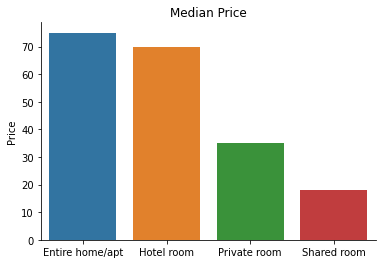

In [474]:
rm_type_median = sns.barplot(x='room_type',y='price',data=rm_type_price_med)
rm_type_median.set(xlabel=None, ylabel='Price', title='Median Price')
sns.despine()

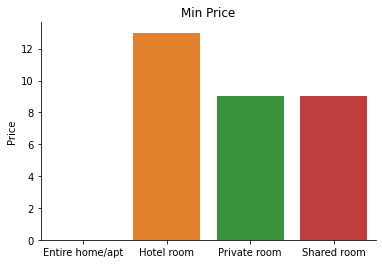

In [476]:
rm_type_min = sns.barplot(x='room_type',y='price',data=rm_type_price_min)
rm_type_min.set(xlabel=None, ylabel='Price', title='Min Price')
sns.despine()

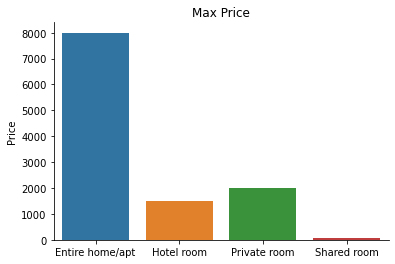

In [477]:
rm_type_max = sns.barplot(x='room_type',y='price',data=rm_type_price_max)
rm_type_max.set(xlabel=None, ylabel='Price', title='Max Price')
sns.despine()

In [489]:
neigh_price_min = listings_two[mask].groupby(['neighbourhood'])[['price']].min().sort_values(by='price',ascending=False).reset_index()
neigh_price_max = listings_two[mask].groupby(['neighbourhood'])[['price']].max().reset_index()
neigh_price_mean = listings_two[mask].groupby(['neighbourhood'])[['price']].mean().round(2).reset_index()
neigh_price_med = listings_two[mask].groupby(['neighbourhood'])[['price']].median().reset_index()

neigh_price_min.drop(neigh_price_min.index[6:], inplace=True)
neigh_price_max.drop(neigh_price_max.index[6:], inplace=True)
neigh_price_med.drop(neigh_price_med.index[6:], inplace=True)
neigh_price_min

,neighbourhood,price
0,Cardosas,280
1,Vermelha,235
2,Vila Verde dos Francos,180
3,Vale do Paraso,150
4,Carregado e Cadafais,95
5,Aveiras de Baixo,89


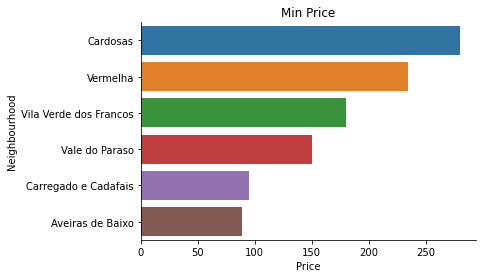

In [487]:
neigh_price_min_plot = sns.barplot(x='price',y='neighbourhood',data=neigh_price_min)
neigh_price_min_plot.set(xlabel='Price', ylabel='Neighbourhood', title='Min Price')
sns.despine()

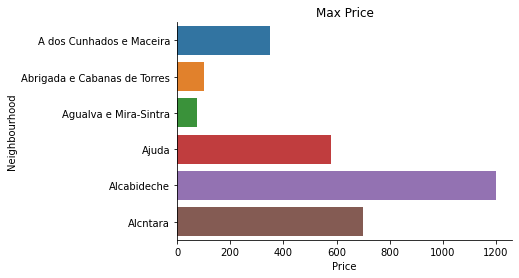

In [490]:
neigh_price_max_plot = sns.barplot(x='price',y='neighbourhood',data=neigh_price_max)
neigh_price_max_plot.set(xlabel='Price', ylabel='Neighbourhood', title='Max Price')
sns.despine()

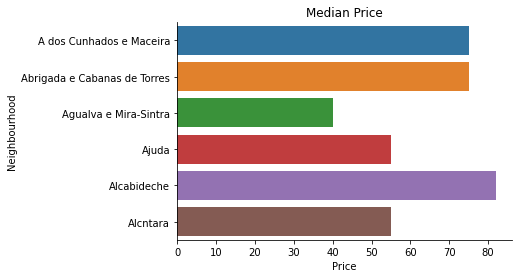

In [491]:
neigh_price_med_plot = sns.barplot(x='price',y='neighbourhood',data=neigh_price_med)
neigh_price_med_plot.set(xlabel='Price', ylabel='Neighbourhood', title='Median Price')
sns.despine()

In [376]:
type(neigh_rm_type)

pandas.core.frame.DataFrame

In [ ]:
sns.barplot(x='',y='',data=neigh_rm_type)

In [415]:
type(mask)

pandas.core.series.Series

In [431]:
neigh_revs = listings_two[mask].groupby(['neighbourhood'])[['number_of_reviews']].sum().sort_values(by='number_of_reviews',ascending=False).reset_index()
neigh_revs.drop(neigh_revs.index[6:], inplace=True)
neigh_revs

,neighbourhood,number_of_reviews
0,Santa Maria Maior,260245
1,Misericrdia,197801
2,Arroios,83713
3,So Vicente,81719
4,Santo Antnio,65348
5,Estrela,44721


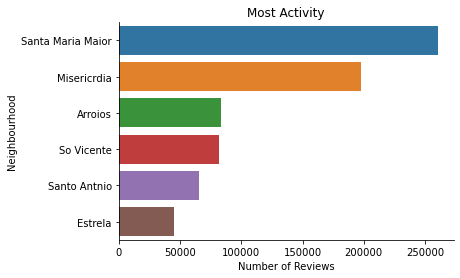

In [436]:
neigh_rev_plot = sns.barplot(x='number_of_reviews', y='neighbourhood', data=neigh_revs)
neigh_rev_plot.set(xlabel='Number of Reviews', ylabel='Neighbourhood', title='Most Activity')
sns.despine()

In [101]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8870230 entries, 0 to 8870229
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       object        
 3   price           object        
 4   adjusted_price  object        
 5   minimum_nights  float64       
 6   maximum_nights  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 473.7+ MB


In [102]:
listings_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24302 entries, 0 to 24301
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              24302 non-null  int64         
 1   name                            24283 non-null  object        
 2   host_id                         24302 non-null  int64         
 3   host_name                       24301 non-null  object        
 4   neighbourhood_group             24302 non-null  object        
 5   neighbourhood                   24302 non-null  object        
 6   latitude                        24302 non-null  float64       
 7   longitude                       24302 non-null  float64       
 8   room_type                       24302 non-null  object        
 9   price                           24302 non-null  int64         
 10  minimum_nights                  24302 non-null  int64         
 11  nu

In [112]:
# lis_cal = calendar.merge(listings_two, on='id')
lis_cal = pd.merge(listings_two, calendar, how='left', left_on='id', right_on='listing_id')
lis_cal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8870230 entries, 0 to 8870229
Data columns (total 23 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   id                              int64         
 1   name                            object        
 2   host_id                         int64         
 3   host_name                       object        
 4   neighbourhood_group             object        
 5   neighbourhood                   object        
 6   latitude                        float64       
 7   longitude                       float64       
 8   room_type                       object        
 9   price_x                         int64         
 10  minimum_nights_x                int64         
 11  number_of_reviews               int64         
 12  last_review                     datetime64[ns]
 13  reviews_per_month               float64       
 14  calculated_host_listings_count  int64         
 15

In [345]:
booked = lis_cal.groupby(['available']).count()[['listing_id']].reset_index()
booked

,available,listing_id
0,f,3338149
1,t,5532081


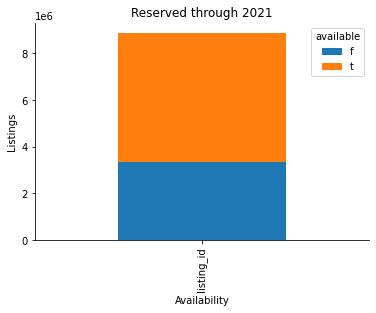

In [347]:
ax = booked.set_index('available').T.plot(kind='bar', stacked=True, title='Reserved through 2021')
ax.set(xlabel='Availability', ylabel='Listings')

sns.despine()

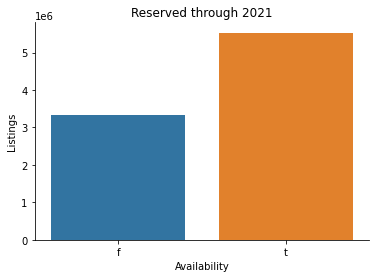

In [348]:
ax_two = sns.barplot(x='available', y='listing_id', data=booked)
ax_two.set(xlabel='Availability', ylabel='Listings', title='Reserved through 2021')
sns.despine()

# places where booked

In [511]:
neigh_f = lis_cal.groupby(['available', 'neighbourhood']).count()[['listing_id']].sort_values(by='listing_id', ascending=False).reset_index()
neigh_booked = neigh_f.loc[neigh_f['available']=='f'].reset_index()
neigh_booked.drop(['index'], axis=1, inplace=True)
neigh_booked.drop(neigh_booked.index[7:], inplace=True)
neigh_booked

,available,neighbourhood,listing_id
0,f,Santa Maria Maior,407777
1,f,Arroios,362547
2,f,Misericrdia,353370
3,f,Cascais e Estoril,217121
4,f,Santo Antnio,202018
5,f,So Vicente,187460
6,f,Estrela,158668


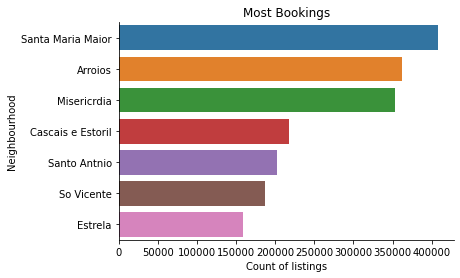

In [514]:
neigh_booked_plot = sns.barplot(x='listing_id', y='neighbourhood', data=neigh_booked)
neigh_booked_plot.set(xlabel='Count of listings', ylabel='Neighbourhood', title='Most Bookings')
sns.despine()

In [53]:
mask2 = (listings_two['last_review'] > '2018-6-5') & (listings_two['last_review'] <= '2019-6-5')
listings_two[mask2]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
18,65878,Caetanos Loft,322145,João,Lisboa,Misericrdia,38.71191,-9.14632,Entire home/apt,80,2,53,2018-09-13,0.48,1,211
28,89015,GREAT LUXURY HOUSE IN THE CENTER,485573,Justo,Lisboa,Misericrdia,38.71240,-9.14989,Entire home/apt,125,3,28,2019-01-04,0.26,1,349
29,90931,NORONHA apartment - BAIRRO ALTO,184400,Justostay,Lisboa,Santo Antnio,38.71767,-9.15262,Entire home/apt,120,3,16,2018-07-25,0.16,8,364
32,97503,Lovely equipped flat in city centre,515924,Joel,Lisboa,Santo Antnio,38.72024,-9.14317,Private room,22,20,41,2018-06-27,0.38,10,154
35,105560,Cozy room near the beach,547928,Paula,Cascais,Cascais e Estoril,38.70035,-9.38247,Private room,30,2,15,2018-10-31,0.64,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19544,34900796,Premium 1BR | Downtown | Elevator | Daily HSK ...,263048047,Porta Do Mar,Lisboa,Santa Maria Maior,38.70996,-9.13492,Entire home/apt,100,1,1,2019-06-01,0.08,1,365
19545,34901212,Premium Studio | Downtown | Elevator | Daily HSK,263050252,Porta Do Mar,Lisboa,Santa Maria Maior,38.70992,-9.13463,Entire home/apt,100,1,1,2019-05-25,0.08,1,354
19571,34938040,Quarto em apartamento em região Central de Lisboa,88759063,Rogerio Tadeu,Lisboa,So Domingos de Benfica,38.73858,-9.16367,Private room,45,1,1,2019-06-02,0.08,1,179
19658,35105618,"campo pequeno旁,独立房间2",48179915,Wayne,Lisboa,Avenidas Novas,38.74101,-9.14378,Private room,35,2,1,2019-06-02,0.08,5,0


In [54]:
mask3 = (listings_two['last_review'] > '2017-6-5') & (listings_two['last_review'] <= '2018-6-5')
listings_two[mask3]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
21,83615,Sleep 4 - Tram 28 - 302/AL,184400,Justostay,Lisboa,Estrela,38.71255,-9.16001,Entire home/apt,85,3,18,2018-04-30,0.18,8,341
109,212549,Awesome reviews - historic center,1096085,Carla,Lisboa,Misericrdia,38.71322,-9.14658,Entire home/apt,80,2,182,2017-10-04,1.72,1,0
117,222942,Quarto com muita luz,1157493,Lígia,Lisboa,Arroios,38.73194,-9.13383,Private room,60,1,4,2018-04-29,0.10,1,365
118,224040,Room with a view,1165468,Nuno,Lisboa,Misericrdia,38.70960,-9.14686,Private room,55,3,11,2017-12-31,0.10,2,62
149,263399,Cosy Apartment in Lisbon 3 bedrooms,405842,Augusto,Lisboa,Campolide,38.72732,-9.16373,Entire home/apt,90,28,20,2018-03-27,0.21,7,248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13557,24870457,Quarto Amoreiras,188013825,Campolide,Lisboa,Campolide,38.72742,-9.16501,Private room,55,1,1,2018-05-12,0.04,2,269
13570,24889064,Conforto nas férias,132952310,Diogo,Amadora,Mina de gua,38.76708,-9.22908,Private room,30,1,1,2018-05-07,0.04,1,0
13611,24944252,Quinta do Pé Descalço - Sintra | Quarto Ribafria,188008860,Patricia,Sintra,"S.Maria, S.Miguel, S.Martinho, S.Pedro Penaferrim",38.81648,-9.38122,Private room,90,2,1,2018-05-23,0.04,5,350
13613,24949072,Over the rooftops of Bairro Alto,38001829,Anna,Lisboa,Misericrdia,38.71073,-9.14312,Entire home/apt,48,2,1,2018-05-09,0.04,1,0


In [55]:
mask4 = (listings_two['last_review'] > '2016-6-5') & (listings_two['last_review'] <= '2017-6-5')
listings_two[mask4]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
155,272947,Charming Central Lisbon Apartment,1428237,Belinda,Lisboa,Estrela,38.71515,-9.15826,Entire home/apt,80,3,7,2017-04-18,0.07,1,0
184,311040,até 4 p Alfama - Sé de Lisboa I,1599678,Patrícia,Lisboa,Santa Maria Maior,38.71246,-9.12891,Entire home/apt,85,3,1,2017-04-10,0.03,3,357
185,311047,Central - Alfama - Sé de Lisboa II,1599678,Patrícia,Lisboa,Santa Maria Maior,38.71211,-9.12819,Entire home/apt,57,2,3,2016-06-19,0.05,3,364
232,408367,Cool and Central Apartment,341233,Ricardo,Lisboa,Lumiar,38.76083,-9.17456,Entire home/apt,42,4,13,2016-12-26,0.15,1,362
236,418945,Nice view over Tagus River @ Lisboa,2083563,Manuel,Lisboa,Belm,38.70977,-9.20967,Private room,110,1,2,2016-07-10,0.03,3,186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8689,18085868,Joyful flat in the heart of Alfama,60980399,Jean-François,Lisboa,Santa Maria Maior,38.70986,-9.13032,Entire home/apt,47,1,3,2017-05-01,0.08,1,0
8958,18458294,Modern room in centre of Lisbon!,90756433,João,Lisboa,Arroios,38.72602,-9.14270,Private room,25,2,2,2017-05-31,0.05,1,157
10109,19898625,Apartment in Lisbon 302 - Alfama,140893245,TravelingToLisbon,Lisboa,Santa Maria Maior,38.71108,-9.13061,Entire home/apt,65,2,1,2017-05-24,0.03,61,364
10112,19898638,TravelingToLisbon 308 - Marquês de Pombal,140893245,TravelingToLisbon,Lisboa,Santo Antnio,38.71736,-9.14661,Entire home/apt,60,3,1,2017-04-16,0.03,61,364


In [58]:
mask5 = (listings_two['last_review'] > '2015-6-5') & (listings_two['last_review'] <= '2016-6-5')
listings_two[mask5].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 49 to 5520
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              118 non-null    int64         
 1   name                            118 non-null    object        
 2   host_id                         118 non-null    int64         
 3   host_name                       118 non-null    object        
 4   neighbourhood_group             118 non-null    object        
 5   neighbourhood                   118 non-null    object        
 6   latitude                        118 non-null    float64       
 7   longitude                       118 non-null    float64       
 8   room_type                       118 non-null    object        
 9   price                           118 non-null    int64         
 10  minimum_nights                  118 non-null    int64         
 11  numb

In [59]:
mask6 = (listings_two['last_review'] > '2014-6-5') & (listings_two['last_review'] <= '2015-6-5')
listings_two[mask6].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 156 to 3140
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              28 non-null     int64         
 1   name                            28 non-null     object        
 2   host_id                         28 non-null     int64         
 3   host_name                       28 non-null     object        
 4   neighbourhood_group             28 non-null     object        
 5   neighbourhood                   28 non-null     object        
 6   latitude                        28 non-null     float64       
 7   longitude                       28 non-null     float64       
 8   room_type                       28 non-null     object        
 9   price                           28 non-null     int64         
 10  minimum_nights                  28 non-null     int64         
 11  numb

In [60]:
mask7 = (listings_two['last_review'] > '2013-6-5') & (listings_two['last_review'] <= '2014-6-5')
listings_two[mask7].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 238 to 1579
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              11 non-null     int64         
 1   name                            11 non-null     object        
 2   host_id                         11 non-null     int64         
 3   host_name                       11 non-null     object        
 4   neighbourhood_group             11 non-null     object        
 5   neighbourhood                   11 non-null     object        
 6   latitude                        11 non-null     float64       
 7   longitude                       11 non-null     float64       
 8   room_type                       11 non-null     object        
 9   price                           11 non-null     int64         
 10  minimum_nights                  11 non-null     int64         
 11  numb

In [61]:
mask8 = (listings_two['last_review'] > '2012-6-5') & (listings_two['last_review'] <= '2013-6-5')
listings_two[mask8].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 56 to 618
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              3 non-null      int64         
 1   name                            3 non-null      object        
 2   host_id                         3 non-null      int64         
 3   host_name                       3 non-null      object        
 4   neighbourhood_group             3 non-null      object        
 5   neighbourhood                   3 non-null      object        
 6   latitude                        3 non-null      float64       
 7   longitude                       3 non-null      float64       
 8   room_type                       3 non-null      object        
 9   price                           3 non-null      int64         
 10  minimum_nights                  3 non-null      int64         
 11  number_

In [62]:
mask9 = (listings_two['last_review'] > '2011-6-5') & (listings_two['last_review'] <= '2012-6-5')
listings_two[mask9].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 6 to 6
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              1 non-null      int64         
 1   name                            1 non-null      object        
 2   host_id                         1 non-null      int64         
 3   host_name                       1 non-null      object        
 4   neighbourhood_group             1 non-null      object        
 5   neighbourhood                   1 non-null      object        
 6   latitude                        1 non-null      float64       
 7   longitude                       1 non-null      float64       
 8   room_type                       1 non-null      object        
 9   price                           1 non-null      int64         
 10  minimum_nights                  1 non-null      int64         
 11  number_of_

## create a years list and counts list and add to axes of a plot 

In [ ]:
# plot sum'listing_id' by last_review

In [165]:
yr_reviews = listings_two.groupby(['last_review']).count()[['number_of_reviews']].reset_index()
yr_reviews.tail(50)
yr_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   last_review        1284 non-null   datetime64[ns]
 1   number_of_reviews  1284 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 20.2 KB


In [163]:
# Groupby months

In [179]:
# listings_two.last_review.groupby(pd.Grouper(freq='M'))
listings_two.index = pd.to_datetime(listings_two['last_review'],format='%m/%d/%y %I:%M%p')
yr_months = listings_two.groupby(by=[listings_two.index.month, listings_two.index.year])
yr_months.count()

id  name  host_id  host_name  neighbourhood_group  \
last_review last_review                                                        
1.0         2014.0          1     1        1          1                    1   
            2015.0          1     1        1          1                    1   
            2016.0          8     8        8          8                    8   
            2017.0          8     8        8          8                    8   
            2018.0         46    46       46         46                   46   
            2019.0        103   103      103        103                  103   
            2020.0       1792  1792     1792       1792                 1792   
2.0         2013.0          1     1        1          1                    1   
            2014.0          1     1        1          1                    1   
            2015.0          2     2        2          2                    2   
            2016.0          3     3        3          3                    3   
            2017.0          8     8        8          8                    8   
            2018.0         22    22       22         22                   22   
            2019.0         55    55       55         55                   55   
            2020.0       2006  2006     2006       2006                 2006   
3.0         2015.0          1     1        1          1                    1   
            2016.0          6     6        6          6                    6   
            2017.0         11    11       11         11                   11   
            2018.0         43    43       43         43                   43   
            2019.0         72    72       72         72                   72   
            2020.0       5991  5989     5991       5991                 5991   
4.0         2015.0          1     1        1          1                    1   
            2016.0          6     6        6          6                    6   
            2017.0         33    33       33         33                   33   
            2018.0         52    52       52         52                   52   
            2019.0        158   158      158        158                  158   
            2020.0        428   428      428        428                  428   
5.0         2013.0          1     1        1          1                    1   
            2014.0          5     5        5          5                    5   
            2015.0         11    11       11         11                   11   
            2016.0         12    12       12         12                   12   
            2017.0         22    22       22         22                   22   
            2018.0        109   109      109        109                  109   
            2019.0        196   196      196        196                  196   
            2020.0        598   598      598        598                  598   
6.0         2014.0          1     1        1          1                    1   
            2015.0          5     5        5          5                    5   
            2016.0         15    15       15         15                   15   
            2017.0         35    35       35         35                   35   
            2018.0         74    74       74         74                   74   
            2019.0        292   292      292        292                  292   
            2020.0         76    76       76         76                   76   
7.0         2011.0          1     1        1          1                    1   
            2014.0          1     1        1          1                    1   
            2015.0          9     9        9          9                    9   
            2016.0         27    27       27         27                   27   
            2017.0         64    64       64         64                   64   
            2018.0        173   173      173        173                  173   
            2019.0        4

In [270]:
# listings_two['YearMonth'] = pd.to_datetime(listings_two['last_review']).apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))

yr_mn = listings_two.groupby(pd.Grouper(freq='M'))

res = yr_mn['number_of_reviews'].count().reset_index()
res.drop(res.index[0:66], inplace=True)
res = res.reset_index()
res.drop(columns='index', inplace=True)
res

,last_review,number_of_reviews
0,2017-01-31,8
1,2017-02-28,8
2,2017-03-31,11
3,2017-04-30,33
4,2017-05-31,22
5,2017-06-30,35
6,2017-07-31,64
7,2017-08-31,154
8,2017-09-30,91
9,2017-10-31,60


In [253]:
type(res)

pandas.core.frame.DataFrame

# plot above

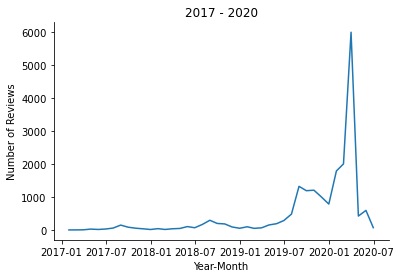

In [356]:
by_year = sns.lineplot(x='last_review', y='number_of_reviews', data=res)
by_year.set(xlabel='Year-Month', ylabel='Number of Reviews', title='2017 - 2020')
sns.despine()

In [286]:
res_two = yr_mn['number_of_reviews'].count().reset_index()
res_two.drop(res_two.index[0:101], inplace=True)
res_two = res_two.reset_index()
res_two.drop(columns='index', inplace=True)
res_two

,last_review,number_of_reviews
0,2019-12-31,790
1,2020-01-31,1792
2,2020-02-29,2006
3,2020-03-31,5991
4,2020-04-30,428
5,2020-05-31,598
6,2020-06-30,76


In [284]:
type(res_two)

pandas.core.frame.DataFrame

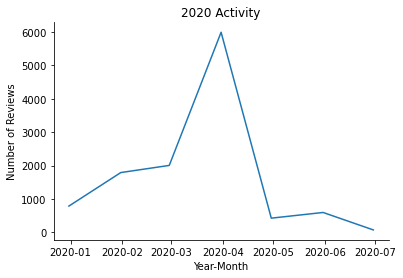

In [354]:
quar = sns.lineplot(x='last_review', y='number_of_reviews', data=res_two)
quar.set(xlabel='Year-Month', ylabel='Number of Reviews', title='2020 Activity')
sns.despine()

# how do I get the min and max price for entire home/apt?

In [392]:
# listings_two[mask].groupby(['room_type']).agg(np.mean)['price'].round(2)
# listings_two[mask].groupby(['room_type']).min
# listings_two[mask]['price'].mean().round(2)
ent_home_apt = listings_two.loc[listings_two['room_type']=='Entire home/apt']
# ent_home_apt
ent_home_apt['price'].median().round(2)
ent_home_apt['price'].min().round(2)
ent_home_apt['price'].max().round(2)

8125

# can't drop outlier ?

In [703]:
home_apt_lisboa = listings_two[mask].loc[listings_two[mask]['neighbourhood_group']=='Lisboa']

# outlier = home_apt_lisboa.loc[home_apt_lisboa['price']==8000]
home_apt_lisboa

KeyError: 0

In [671]:
home_apt_lisboa = listings_two[mask].loc[listings_two[mask]['neighbourhood_group']=='Lisboa']

# home_apt_lisboa.loc(home_apt_lisboa['price']=='8000')

TypeError: 'Series' objects are mutable, thus they cannot be hashed

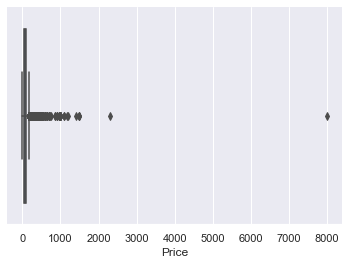

In [678]:
box_lisboa = sns.boxplot(x=home_apt_lisboa['price'])
box_lisboa.set(xlabel='Price', ylabel=None)
sns.set(context='notebook',style='darkgrid')
sns.despine(left=True)

# number of reviews per neighbourhood
- use sum or count? * minimum nights * price

In [385]:
listings_two[mask].groupby(['neighbourhood']).agg(np.sum)['number_of_reviews'].sort_values(ascending=False)
# listings_two[mask].groupby(['neighbourhood']).agg(np.sum)['number_of_reviews'].sort_values(ascending=False)

neighbourhood
Santa Maria Maior                                    260245
Misericrdia                                          197801
Arroios                                               83713
So Vicente                                            81719
Santo Antnio                                          65348
Estrela                                               44721
Cascais e Estoril                                     29345
S.Maria, S.Miguel, S.Martinho, S.Pedro Penaferrim     20499
Avenidas Novas                                        19794
Penha de Frana                                        18385
Ericeira                                              11818
Campo de Ourique                                      11775
Olivais                                               10841
Alcntara                                              10213
Colares                                                9660
Belm                                                   9599
Areeiro                   

In [35]:
listings_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24302 entries, 0 to 24301
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              24302 non-null  int64         
 1   name                            24283 non-null  object        
 2   host_id                         24302 non-null  int64         
 3   host_name                       24301 non-null  object        
 4   neighbourhood_group             24302 non-null  object        
 5   neighbourhood                   24302 non-null  object        
 6   latitude                        24302 non-null  float64       
 7   longitude                       24302 non-null  float64       
 8   room_type                       24302 non-null  object        
 9   price                           24302 non-null  int64         
 10  minimum_nights                  24302 non-null  int64         
 11  nu

In [36]:
listings_two.groupby(['neighbourhood']).agg(np.sum).describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.260000e+02,1.260000e+02,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,4.353595e+09,1.830488e+10,7474.915485,-1774.904551,21513.412698,654.103175,7993.825397,220.818651,2861.333333,43109.603175
std,1.145758e+10,4.689039e+10,20349.080500,4815.447524,64485.172209,1661.044967,32166.081308,817.953695,10255.787694,125110.569032
min,3.752499e+06,1.186533e+07,38.974770,-34161.072190,70.000000,2.000000,1.000000,0.040000,1.000000,37.000000
25%,1.392032e+08,6.962922e+08,271.597178,-950.738523,486.750000,15.000000,54.000000,2.005000,11.000000,1319.500000
50%,4.975726e+08,2.499444e+09,779.702965,-182.761820,1548.500000,53.000000,210.500000,7.190000,66.000000,4626.000000
75%,2.337912e+09,1.110209e+10,3996.868360,-64.646800,12844.500000,391.750000,1848.500000,64.612500,613.750000,21247.000000
max,7.912594e+10,3.241754e+11,144785.037620,-8.888230,532481.000000,9501.000000,267606.000000,6630.080000,76223.000000,954617.000000


In [38]:
calendar.describe()

,listing_id,minimum_nights,maximum_nights
count,8.870230e+06,8.869861e+06,8.869861e+06
mean,2.257234e+07,3.664800e+00,8.944841e+05
std,1.213012e+07,1.597480e+01,4.301646e+07
min,6.499000e+03,1.000000e+00,1.000000e+00
25%,1.348852e+07,1.000000e+00,3.600000e+02
50%,2.298439e+07,2.000000e+00,1.125000e+03
75%,3.279901e+07,3.000000e+00,1.125000e+03
max,4.356874e+07,3.180000e+03,2.147484e+09


In [516]:
calendar.groupby('listing_id').mean()

,minimum_nights,maximum_nights
listing_id,,
6499,3.0,365.0
25659,3.0,1125.0
29248,1.0,1125.0
29396,2.0,1125.0
29720,2.0,730.0
...,...,...
43563899,3.0,1125.0
43563972,4.0,1125.0
43566725,4.0,1125.0


In [48]:
listings_two.columns.values

array(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'], dtype=object)

In [49]:
listings_two.loc[listings_two['availability_365']>180].count()

id                                14913
name                              14904
host_id                           14913
host_name                         14913
neighbourhood_group               14913
neighbourhood                     14913
latitude                          14913
longitude                         14913
room_type                         14913
price                             14913
minimum_nights                    14913
number_of_reviews                 14913
last_review                       12478
reviews_per_month                 12478
calculated_host_listings_count    14913
availability_365                  14913
dtype: int64

In [50]:
listings_two[['host_id', 'calculated_host_listings_count']]

,host_id,calculated_host_listings_count
0,14455,1
1,107347,1
2,125768,1
3,126415,2
4,128075,2
...,...,...
24297,3849818,1
24298,344546018,1
24299,233442821,3
24300,13224750,2


In [51]:
listings_two.groupby(['host_id']).agg(np.mean)

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
host_id,,,,,,,,,
14455,6499.0,38.697500,-9.197680,40.0,3.0,26.0,0.370,1.0,340.0
17096,18644258.0,38.708870,-9.147220,100.0,3.0,2.0,0.070,1.0,88.0
58150,34804018.5,38.714765,-9.143440,142.5,2.0,13.5,1.045,2.0,115.5
68805,18626026.5,38.705720,-9.159850,41.5,30.0,18.5,0.445,2.0,289.5
107347,25659.0,38.711670,-9.126960,60.0,3.0,113.0,1.520,1.0,321.0
...,...,...,...,...,...,...,...,...,...
346766646,43505523.0,38.710863,-9.133270,100.0,2.0,0.0,NaN,3.0,315.0
346766993,43485605.5,38.723785,-9.136305,160.0,1.0,0.0,NaN,2.0,361.5
346987534,43505592.0,38.701175,-9.195165,115.0,2.0,0.0,NaN,2.0,341.0


## Calculate total income